In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('mi.csv')

In [3]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [4]:
le = LabelEncoder()
df['recclass']= le.fit_transform(df['recclass'].astype('str'))

In [5]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,327,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,191,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,84,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,0,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,333,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [6]:
le = LabelEncoder()
df['nametype']= le.fit_transform(df['nametype'].astype('str'))
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,1,327,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,1,191,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,1,84,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,1,0,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,1,333,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [7]:
le = LabelEncoder()
df['fall']= le.fit_transform(df['fall'].astype('str'))
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,1,327,21.0,0,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,1,191,720.0,0,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,1,84,107000.0,0,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,1,0,1914.0,0,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,1,333,780.0,0,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [12]:
import datetime
t.to_pydatetime() 

year = df['year']
timestamp=[]
for i in year:
    dateTime = datetime.datetime.strptime(i[:10], '%m/%d/%Y')
    timestamp.append(dateTime.timestamp())
    
df['Timestamp'] = timestamp
df.head()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1583-01-01 00:00:00

In [5]:
# rename colums
# df = df.rename(columns= {'Date/Time - Peak Brightness (UT)':'date', 
#                           'Latitude (Deg)':'lat', 
#                           'Longitude (Deg)':'long',
#                         'Altitude (km)': 'alt',
#                          'Velocity (km/s)': 'vel',
#                          'Velocity Components (km/s): vx': 'velx',
#                          'Velocity Components (km/s): vy': 'vely',
#                          'Velocity Components (km/s): vz': 'velz',
#                          'Total Radiated Energy (J)':'tot_j',
#                          'Calculated Total Impact Energy (kt)': 'tot_kt' 
#                         })

r, c = df.shape

In [6]:
## missing data

missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/r)*100})
missing_data

,perc_missing,total_missing
name,0.000000,0
id,0.000000,0
nametype,0.000000,0
recclass,0.000000,0
mass (g),0.286552,131
fall,0.000000,0
year,0.636539,291
reclat,16.000962,7315
reclong,16.000962,7315
GeoLocation,16.000962,7315


In [7]:
df.describe()

,id,mass (g),reclat,reclong
count,45716.000000,4.558500e+04,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,-39.122580,61.074319
std,16860.683030,5.749889e+05,46.378511,80.647298
min,1.000000,0.000000e+00,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,-76.714240,0.000000
50%,24261.500000,3.260000e+01,-71.500000,35.666670
75%,40656.750000,2.026000e+02,0.000000,157.166670
max,57458.000000,6.000000e+07,81.166670,354.473330


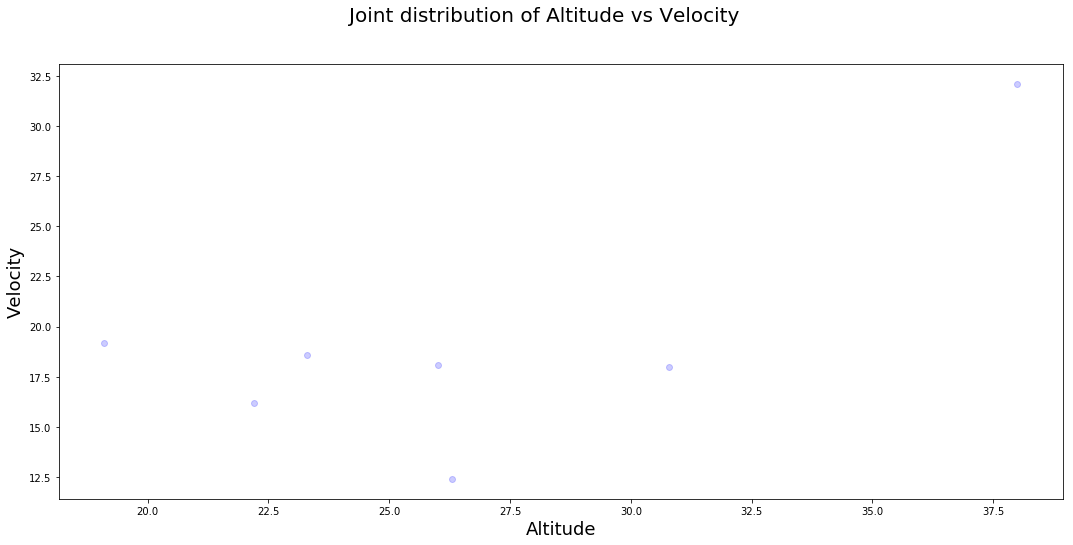

In [106]:
plt.figure(figsize=(18,8))
plt.xlabel("mass (g)", fontsize=18)
plt.ylabel("Velocity", fontsize=18)
plt.suptitle("Joint distribution of Altitude vs Velocity", fontsize= 20)
plt.plot(df['alt'], df['vel'], 'bo', alpha=0.2)
plt.show()

IndexError: list index out of range

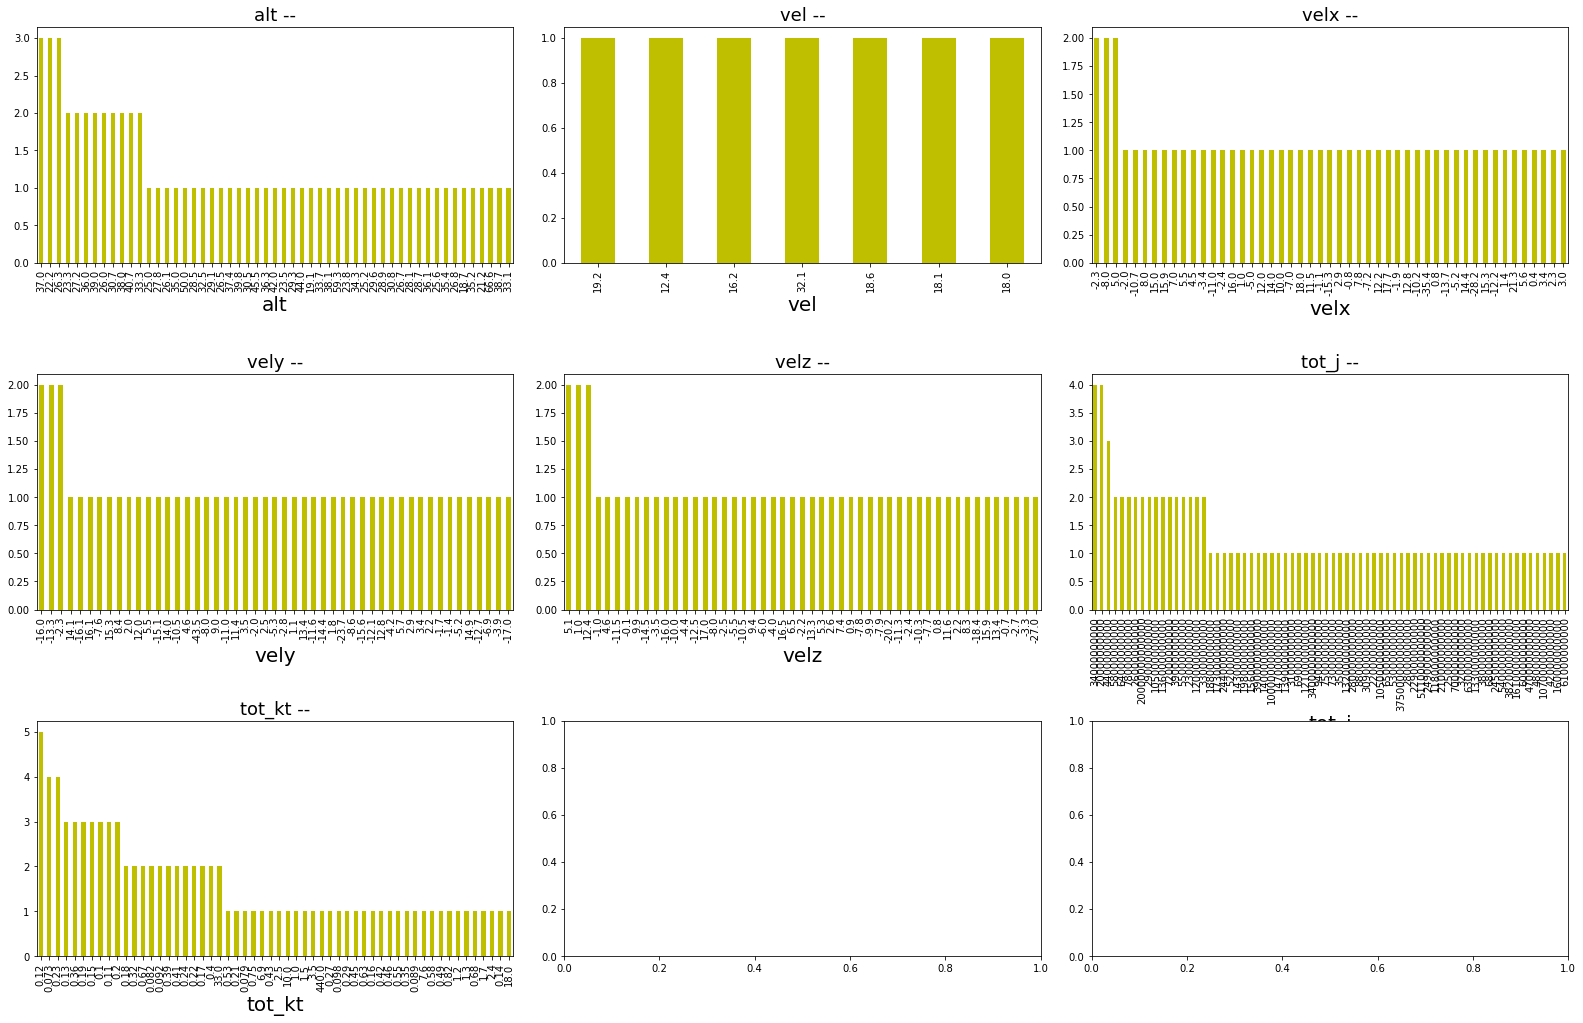

In [107]:
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot('bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} --".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['alt','vel', 'velx', 'vely','velz', 'tot_j', 'tot_kt']
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

In [108]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)
    
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

In [109]:
to_drop = ['date', 'lat', 'long']

df = df.drop(to_drop, axis=1)
# df = df.replace(np.nan, 0)
df.head()
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values 

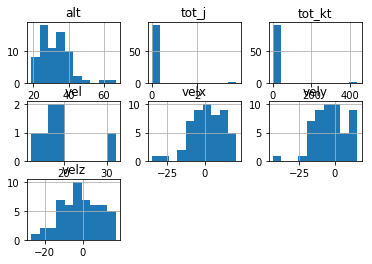

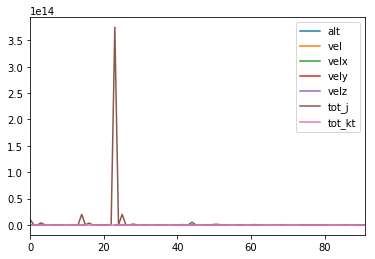

In [110]:
df.hist()
df.plot()

In [111]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
X = imp.fit_transform(X)
Y = Y.reshape(-1,1)
Y = imp.fit_transform(Y)
Y = Y.reshape(-1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [113]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [114]:
y_train[:]

array([1.7e-01, 1.5e+00, 3.5e-01, 1.2e-01, 4.6e-01, 8.2e-02, 8.2e-02,
       7.3e-02, 2.0e-01, 6.7e-01, 4.2e-01, 7.6e+00, 1.9e-01, 1.4e-01,
       1.2e-01, 4.1e-01, 7.3e-02, 9.8e-02, 3.9e-01, 1.7e+00, 1.3e-01,
       1.1e-01, 4.0e-01, 1.2e-01, 1.6e-01, 7.9e-02, 2.3e-01, 3.2e-01,
       1.0e-01, 1.8e+01, 2.2e-01, 3.5e+00, 2.4e+00, 1.9e-01, 5.3e-01,
       4.4e+02, 1.5e-01, 1.2e-01, 1.0e-01, 1.0e-01, 2.3e-01, 3.6e-01,
       4.1e-01, 1.8e-01, 4.9e-01, 3.3e+01, 7.5e-01, 4.3e-01, 2.3e-01,
       1.1e-01, 3.9e-01, 2.7e-01, 1.2e+00, 3.2e-01, 1.2e-01, 8.9e-02,
       3.3e+01, 1.5e-01, 9.2e-02, 1.8e-01, 7.3e-02, 2.0e-01, 4.5e-01,
       1.3e-01, 2.4e-01, 1.3e+00, 1.7e-01, 2.0e-01, 1.5e-01, 5.5e-01,
       2.1e-01, 4.0e-01, 1.0e+01])

In [115]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
regr.score(X_test, y_test)

0.6848909337498763